# Esta notebook es para analizar los distintos dispositivos y navegadores utilizados    

In [2]:
# librerías a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
# cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
conversion_events = events[events['event'] == 'conversion'][['timestamp', 'event', 'person']]
checkout_events = events[events['event'] == 'checkout'][['timestamp', 'event', 'person']]
visited_events = events[events['event'] == 'visited site'][['timestamp', 'person', 'device_type']]

In [5]:
# busco los principales OS
os_events = events.groupby('operating_system_version').agg({'event':'count'}).sort_values(by='event',ascending = False)
os_events.reset_index(inplace = True)
os_events.head()

,operating_system_version,event
0,Windows 7,19675
1,Windows 10,17110
2,Android 7,9964
3,Android 6.0.1,7805
4,Android 6,6871


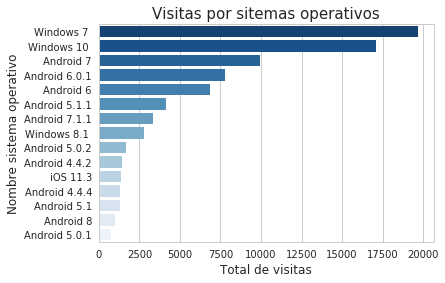

In [6]:
g = sns.barplot(x=os_events.event, y=os_events.operating_system_version[:15], palette=sns.color_palette('Blues_r', 15))
g.set_title("Visitas por sitemas operativos", fontsize=15)
g.set_xlabel("Total de visitas", fontsize=12)
g.set_ylabel("Nombre sistema operativo", fontsize=12);

Vemos que principalmente se ingresa a la página desde Android y Windows.

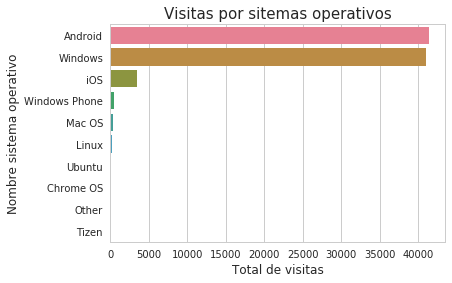

In [7]:
events['operating_system_name'] = events['operating_system_version'].str.split(' ').str[0]
events['operating_system_name'] = np.where(events['operating_system_version'].str.split(' ').str[1]=='Phone', events['operating_system_name'] + ' Phone', events['operating_system_name'])
events['operating_system_name'] = np.where(events['operating_system_version'].str.split(' ').str[1]=='OS', events['operating_system_name'] + ' OS', events['operating_system_name'])
name_os_events = events.groupby('operating_system_name').agg({'event':'count'})
name_os_events = name_os_events.sort_values(by='event',ascending = False)
name_os_events.reset_index(inplace=True)

g = sns.barplot(x=name_os_events.event, y=name_os_events.operating_system_name, ci=None,palette=sns.color_palette("husl", 8))
g.set_title("Visitas por sitemas operativos", fontsize=15)
g.set_xlabel("Total de visitas", fontsize=12)
g.set_ylabel("Nombre sistema operativo", fontsize=12);

In [8]:
# gente con android compra mucho iphone.
android_persons = events[events['operating_system_name'] == 'Android'][['timestamp', 'person']]
merged = pd.merge(android_persons, events[events['event'] == 'conversion'][['person', 'timestamp', 'model']], on='person', how='left')
merged = merged[(merged['timestamp_y'] > merged['timestamp_x'])]
merged = merged.groupby(['person', 'timestamp_y', 'model']).agg({'timestamp_x':'max'}).reset_index()
merged.groupby('model').agg({'timestamp_y':'count'}).sort_values(by='timestamp_y', ascending=False).reset_index().head(10)

,model,timestamp_y
0,iPhone 5s,40
1,iPhone 6,32
2,Samsung Galaxy J5,31
3,Samsung Galaxy J7,15
4,Samsung Galaxy S6 Flat,15
5,iPhone 5c,14
6,Samsung Galaxy A5,14
7,Samsung Galaxy Gran Prime Duos TV,14
8,iPhone 6S,13
9,Motorola Moto G4 Plus,12


Principalmente se ingresa por smartphone, ¿se podría crear una app mobile?

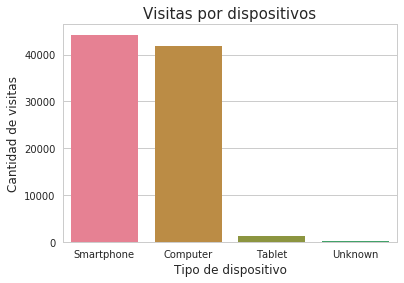

In [9]:
# vemos los tipos de dispositivos
devices = events[events['device_type'].notnull()].groupby('device_type').agg({'event':'count'}).sort_values(by='event', ascending = False)
devices.reset_index(inplace=True)
g = sns.barplot(x=devices.device_type, y=devices.event,palette=sns.color_palette("husl", 8))
g.set_title("Visitas por dispositivos", fontsize=15)
g.set_xlabel("Tipo de dispositivo", fontsize=12)
g.set_ylabel("Cantidad de visitas", fontsize=12);

In [10]:
# buscamos los tipos de navegador usados
browser_events = events.groupby('browser_version').agg({'event':'count'}).sort_values(by='event',ascending = False)
browser_events.reset_index(inplace = True)
browser_events.head()

,browser_version,event
0,Chrome 66.0,22611
1,Chrome Mobile 66.0,17513
2,Chrome 65.0,6635
3,Chrome Mobile 65.0,5665
4,Chrome Mobile 64.0,3083


In [11]:
events['browser_name'] = events['browser_version'].str.split(' ').str[0]
events['browser_name'] = np.where(events['browser_version'].str.split(' ').str[1]=='Mobile', events['browser_name'] + ' Mobile', events['browser_name'])
events[events['event'] == 'visited site'][['event','browser_version', 'browser_name']].head()
browser_names = events.groupby('browser_name').agg({'event':'count'}).sort_values(by = 'event', ascending = False)
browser_names.reset_index(inplace = True)
browser_names.head()

,browser_name,event
0,Chrome,38081
1,Chrome Mobile,37056
2,Mobile,3239
3,Firefox,2566
4,Samsung,1699


Chrome es el navegador más utilizado, tanto mobile como no mobile

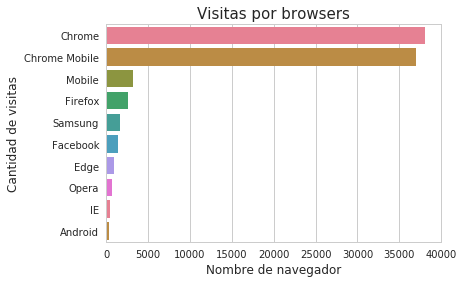

In [12]:
g = sns.barplot(y=browser_names.browser_name[:10], x=browser_names.event, ci=None,palette=sns.color_palette("husl", 8))
g.set_title("Visitas por browsers", fontsize=15)
g.set_xlabel("Nombre de navegador", fontsize=12)
g.set_ylabel("Cantidad de visitas", fontsize=12);

In [13]:
# veo la cantida de compras por dispositivos
merged = pd.merge(visited_events, conversion_events, on='person', how='left')
merged = merged[(merged['timestamp_y'] > merged['timestamp_x'])]
merged = merged.groupby(['person', 'timestamp_y', 'device_type']).agg({'timestamp_x':'max'})
merged.reset_index(inplace = True)
merged['dif'] = merged['timestamp_y'] - merged['timestamp_x']
merged = merged.sort_values(by=['person', 'dif'])
merged = merged.drop_duplicates(subset=['person', 'timestamp_y'])
merged = merged.groupby('device_type').agg({'timestamp_y' : 'count'})
merged.reset_index(inplace = True)
merged

,device_type,timestamp_y
0,Computer,504
1,Smartphone,413
2,Tablet,3
3,Unknown,1


Se puede ver que hay más compras por computadora que por smartphone, cuando hay más visitas desde smartphones. ¿A la gente no le gusta comprar por el celular?

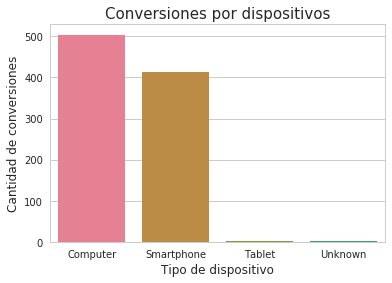

In [14]:
g = sns.barplot(x=merged.device_type, y=merged.timestamp_y,palette=sns.color_palette("husl", 8))
g.set_title("Conversiones por dispositivos", fontsize=15)
g.set_xlabel("Tipo de dispositivo", fontsize=12)
g.set_ylabel("Cantidad de conversiones", fontsize=12);

In [15]:
# veo la cantidad de checkouts por dispositivos
merged2 = pd.merge(visited_events, checkout_events, on='person', how='left')
merged2 = merged2[(merged2['timestamp_y'] > merged2['timestamp_x'])]
merged2 = merged2.groupby(['person', 'timestamp_y', 'device_type']).agg({'timestamp_x':'max'})
merged2.reset_index(inplace = True)
merged2['dif'] = merged2['timestamp_y'] - merged2['timestamp_x']
merged2 = merged2.sort_values(by=['person', 'dif'])
merged2 = merged2.drop_duplicates(subset=['person', 'timestamp_y'])
merged2 = merged2.groupby('device_type').agg({'timestamp_y' : 'count'})
merged2.reset_index(inplace = True)
merged2.sort_values(by='timestamp_y', ascending = False, inplace=True)
merged2

,device_type,timestamp_y
1,Smartphone,16833
0,Computer,15295
2,Tablet,555
3,Unknown,43


Hay más checkouts desde el celuar. La gente hace checkout y luego abandona las compras desde el celuar? 

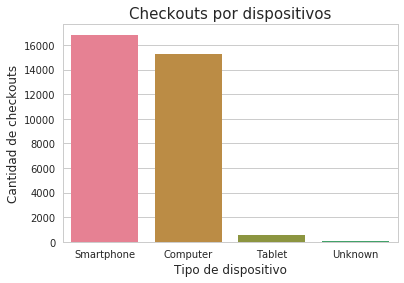

In [16]:
g = sns.barplot(x=merged2.device_type, y=merged2.timestamp_y,palette=sns.color_palette("husl", 8))
g.set_title("Checkouts por dispositivos", fontsize=15)
g.set_xlabel("Tipo de dispositivo", fontsize=12)
g.set_ylabel("Cantidad de checkouts", fontsize=12);

Se puede ver que es mayor la cantidad de checkouts que se abandonan desde smartphone

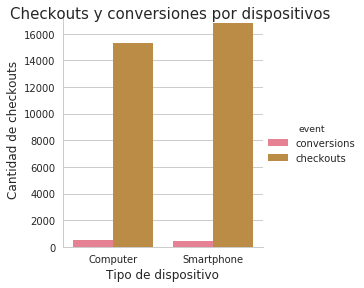

In [17]:
merged.columns = ['device', 'conversions']
merged2.columns = ['device', 'checkouts']
checkouts_vs_conversions = pd.merge(merged, merged2, on='device')
checkouts_vs_conversions.set_index('device', inplace=True)
checkouts_vs_conversions = checkouts_vs_conversions.stack(level=0).reset_index()
checkouts_vs_conversions.columns = ['device','event','quantity']
g = sns.factorplot(x='device', y='quantity', hue='event', data=checkouts_vs_conversions[:4], kind='bar', palette=sns.color_palette("husl", 8))
g.fig.suptitle("Checkouts y conversiones por dispositivos", fontsize=15)
g.set_xlabels("Tipo de dispositivo", fontsize=12)
g.set_ylabels("Cantidad de checkouts", fontsize=12);

In [20]:
a = checkouts_vs_conversions[checkouts_vs_conversions['event'] =='conversions'][['device', 'quantity']]
b = checkouts_vs_conversions[checkouts_vs_conversions['event'] == 'checkouts'][['device', 'quantity']]
c = pd.merge(a, b, how='inner', on='device')
c['percentage'] = (c['quantity_x'] / c['quantity_y'])*100
c

,device,quantity_x,quantity_y,percentage
0,Computer,504,15295,3.295195
1,Smartphone,413,16833,2.453514
2,Tablet,3,555,0.540541
3,Unknown,1,43,2.325581


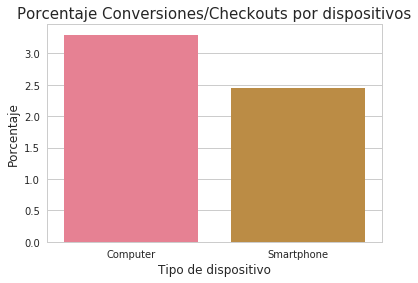

In [21]:
g = sns.barplot(x=c.device[:2], y=c.percentage,palette=sns.color_palette("husl", 8))
g.set_title("Porcentaje Conversiones/Checkouts por dispositivos", fontsize=15)
g.set_xlabel("Tipo de dispositivo", fontsize=12)
g.set_ylabel("Porcentaje", fontsize=12);